# Pysmash

In [1]:
import pandas as pd
import numpy as np
import json
import re
import os
import math
import sqlite3
# import nightclub_utils
import pysmashgg

In [2]:
startgg_key = 'a5beb83485cd7ce813e960398c01bc09'

In [3]:
import sgg
import importlib
importlib.reload(sgg)

<module 'sgg' from 'c:\\Python311\\Lib\\site-packages\\sgg\\__init__.py'>

In [4]:
# Initialize the SmashGGPy class
startgg_raw = pysmashgg.SmashGG(startgg_key)

# Holder for nightclub events
nightclubs_master = []

for i in range(1, 11):
    # Find all tournaments within a .01 mile radius of OS
    os_tournaments = startgg_raw.tournament_show_by_radius('40.7159,-73.9968', '.01mi', i)
    # Pick out all tournaments whose name starts with 'The Nightclub'
    nightclubs = [tourney for tourney in os_tournaments if tourney['name'].startswith('The Nightclub')]
    # Add them to the list
    nightclubs_master += nightclubs

nightclubs_master

[{'id': 769108,
  'name': 'The Nightclub S11E11 @ OS NYC',
  'slug': 'the-nightclub-s11e11-os-nyc',
  'entrants': 14,
  'country': 'US',
  'state': 'NY',
  'city': 'New York',
  'startTimestamp': 1742425200,
  'endTimestamp': 1742443140},
 {'id': 766912,
  'name': 'The Nightclub S11E10 @ OS NYC',
  'slug': 'the-nightclub-s11e10-os-nyc',
  'entrants': 89,
  'country': 'US',
  'state': 'NY',
  'city': 'New York',
  'startTimestamp': 1741820400,
  'endTimestamp': 1741838340},
 {'id': 764318,
  'name': 'The Nightclub S11E9 @ OS NYC',
  'slug': 'the-nightclub-s11e9-os-nyc',
  'entrants': 73,
  'country': 'US',
  'state': 'NY',
  'city': 'New York',
  'startTimestamp': 1741219200,
  'endTimestamp': 1741838340},
 {'id': 761523,
  'name': 'The Nightclub S11E8 @ OS NYC',
  'slug': 'the-nightclub-s11e8-os-nyc',
  'entrants': 66,
  'country': 'US',
  'state': 'NY',
  'city': 'New York',
  'startTimestamp': 1740614400,
  'endTimestamp': 1740632340},
 {'id': 759969,
  'name': 'The Nightclub S11E7 @

In [5]:
test_nightclubs = nightclubs_master

In [6]:
# Turn into DataFrame
nightclubs_df = pd.DataFrame(test_nightclubs)

In [7]:
from datetime import datetime

# Function to turn unix timestamp into 'December 9th 2023' format
def format_timestamp(timestamp):
    date_time = datetime.fromtimestamp(timestamp)
    formatted_date = date_time.strftime(f'%B %d %Y')
    return formatted_date

nightclubs_df['formatted_date'] = nightclubs_df['startTimestamp'].apply(format_timestamp)

nightclubs_df

,id,name,slug,entrants,country,state,city,startTimestamp,endTimestamp,formatted_date
0,769108,The Nightclub S11E11 @ OS NYC,the-nightclub-s11e11-os-nyc,14,US,NY,New York,1742425200,1742443140,March 19 2025
1,766912,The Nightclub S11E10 @ OS NYC,the-nightclub-s11e10-os-nyc,89,US,NY,New York,1741820400,1741838340,March 12 2025
2,764318,The Nightclub S11E9 @ OS NYC,the-nightclub-s11e9-os-nyc,73,US,NY,New York,1741219200,1741838340,March 05 2025
3,761523,The Nightclub S11E8 @ OS NYC,the-nightclub-s11e8-os-nyc,66,US,NY,New York,1740614400,1740632340,February 26 2025
4,759969,The Nightclub S11E7 @ OS NYC,the-nightclub-s11e7-os-nyc,58,US,NY,New York,1740020400,1740038340,February 19 2025
...,...,...,...,...,...,...,...,...,...,...
163,336024,The Nightclub S2E6 @ OS NYC,the-nightclub-s2e6-os-nyc,41,US,NY,New York,1638403200,1638421140,December 01 2021
164,334359,The Nightclub S2E5 @ OS NYC,the-nightclub-s2e5-os-nyc,61,US,NY,New York,1637794800,1637816340,November 24 2021
165,332790,The Nightclub S2E4 @ OS NYC,the-nightclub-s2e4-os-nyc,47,US,NY,New York,1637193600,1637211540,November 17 2021
166,330929,The Nightclub S2E3 @OS NYC,the-nightclub-s2e3-os-nyc,49,US,NY,New York,1636588800,1636606500,November 10 2021


In [8]:
# Take out unnecessary rows
nightclubs_df = nightclubs_df[['id', 'name', 'slug', 'entrants', 'startTimestamp', 'formatted_date']]

nightclubs_df

,id,name,slug,entrants,startTimestamp,formatted_date
0,769108,The Nightclub S11E11 @ OS NYC,the-nightclub-s11e11-os-nyc,14,1742425200,March 19 2025
1,766912,The Nightclub S11E10 @ OS NYC,the-nightclub-s11e10-os-nyc,89,1741820400,March 12 2025
2,764318,The Nightclub S11E9 @ OS NYC,the-nightclub-s11e9-os-nyc,73,1741219200,March 05 2025
3,761523,The Nightclub S11E8 @ OS NYC,the-nightclub-s11e8-os-nyc,66,1740614400,February 26 2025
4,759969,The Nightclub S11E7 @ OS NYC,the-nightclub-s11e7-os-nyc,58,1740020400,February 19 2025
...,...,...,...,...,...,...
163,336024,The Nightclub S2E6 @ OS NYC,the-nightclub-s2e6-os-nyc,41,1638403200,December 01 2021
164,334359,The Nightclub S2E5 @ OS NYC,the-nightclub-s2e5-os-nyc,61,1637794800,November 24 2021
165,332790,The Nightclub S2E4 @ OS NYC,the-nightclub-s2e4-os-nyc,47,1637193600,November 17 2021
166,330929,The Nightclub S2E3 @OS NYC,the-nightclub-s2e3-os-nyc,49,1636588800,November 10 2021


In [9]:
test_slugs = nightclubs_df['slug'].values

test_slugs

array(['the-nightclub-s11e11-os-nyc', 'the-nightclub-s11e10-os-nyc',
       'the-nightclub-s11e9-os-nyc', 'the-nightclub-s11e8-os-nyc',
       'the-nightclub-s11e7-os-nyc', 'the-nightclub-s11e6-os-nyc',
       'the-nightclub-s11e5-os-nyc',
       'the-nightclub-s11e4-300-pot-bonus-lucky-7s',
       'the-nightclub-s11e3-os-nyc', 'the-nightclub-s11e2-os-nyc',
       'the-nightclub-s11e1-season-premiere-os-nyc',
       'the-nightclub-s10e25-season-finale-os-nyc',
       'the-nightclub-s10e24-os-nyc', 'the-nightclub-s10e23-os-nyc',
       'the-nightclub-s10e22-potluck-edition-os-nyc',
       'the-nightclub-s10e21-os-nyc-1', 'the-nightclub-s10e20-os-nyc',
       'the-nightclub-s10e19-os-nyc', 'the-nightclub-s10e18-os-nyc',
       'the-nightclub-s10e17-pre-function-local-os-nyc',
       'the-nightclub-s10e16-os-nyc', 'the-nightclub-s10e15-os-nyc',
       'the-nightclub-s10e14-os-nyc', 'the-nightclub-s10e12-os-nyc',
       'the-nightclub-s10e11-os-nyc', 'the-nightclub-s10e10-os-nyc',
       '

In [10]:
# Initialize the SmashGGPy class
startgg_raw = pysmashgg.SmashGG(startgg_key)

# Tourney list
tourney_list = test_slugs

# List to hold individual DataFrames
df_list = []

for tourney in tourney_list:
    # Fetch the entrants for the tournament
    page_num = 1
    entrants = startgg_raw.tournament_show_entrants(tourney, 'melee-singles', page_num)
    df = pd.DataFrame(entrants)

    # Stop if the current page is blank
    while len(df) > 0:
        # Add current tournament to 'tournament' column
        df['tournament'] = tourney
        # Add current df to the df list
        df_list.append(df)
        # Increment the page number
        page_num += 1
        # Get the next page and do it again (unless the next page is empty)
        entrants = startgg_raw.tournament_show_entrants(tourney, 'melee-singles', page_num)
        df = pd.DataFrame(entrants)

# Concatenate all DataFrames together
all_entrants_df = pd.concat(df_list, ignore_index=True)

all_entrants_df['tag'] = all_entrants_df['entrantPlayers'].apply(lambda x: x[0]['playerTag'] if x else None)
all_entrants_df

Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 524: Unknown server error


TypeError: 'NoneType' object is not subscriptable

In [12]:
tourney_list = tourney_list[37:]
tourney_list

array(['the-nightclub-s9e23-os-nyc', 'the-nightclub-s9e22-os-nyc',
       'the-nightclub-s9e21-os-nyc', 'the-nightclub-s9e20-os-nyc',
       'the-nightclub-s9e19-os-nyc', 'the-nightclub-s9e18-os-nyc',
       'the-nightclub-s9e17-os-nyc', 'the-nightclub-s9e16-os-nyc',
       'the-nightclub-s9e15-os-nyc', 'the-nightclub-s9e14-os-nyc',
       'the-nightclub-s9e13-os-nyc', 'the-nightclub-s9e12-os-nyc',
       'the-nightclub-s9e11-os-nyc',
       'the-nightclub-s9e10-os-nyc-collision-pre-local',
       'the-nightclub-s9e9-os-nyc', 'the-nightclub-s9e8-os-nyc',
       'the-nightclub-s9e7-os-nyc', 'the-nightclub-s9e6-os-nyc',
       'the-nightclub-s9e5-os-nyc', 'the-nightclub-s9e4-os-nyc',
       'the-nightclub-s9e3-os-nyc', 'the-nightclub-s9e2-os-nyc-2',
       'the-nightclub-s9e1-os-nyc-2',
       'the-nightclub-season-8-finale-s8e25-os-nyc',
       'the-nightclub-s8e24-os-nyc', 'the-nightclub-s8e23-os-nyc',
       'the-nightclub-s8e22-os-nyc', 'the-nightclub-s8e21-os-nyc',
       'the-night

In [13]:
df_list = df_list[0:118]

In [14]:
for tourney in tourney_list:
    # Fetch the entrants for the tournament
    page_num = 1
    entrants = startgg_raw.tournament_show_entrants(tourney, 'melee-singles', page_num)
    df = pd.DataFrame(entrants)

    # Stop if the current page is blank
    while len(df) > 0:
        # Add current tournament to 'tournament' column
        df['tournament'] = tourney
        # Add current df to the df list
        df_list.append(df)
        # Increment the page number
        page_num += 1
        # Get the next page and do it again (unless the next page is empty)
        entrants = startgg_raw.tournament_show_entrants(tourney, 'melee-singles', page_num)
        df = pd.DataFrame(entrants)

# Concatenate all DataFrames together
all_entrants_df = pd.concat(df_list, ignore_index=True)

all_entrants_df['tag'] = all_entrants_df['entrantPlayers'].apply(lambda x: x[0]['playerTag'] if x else None)
all_entrants_df

Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too ma

KeyError: 'data'

In [22]:
tourney_list = tourney_list[1:]
tourney_list

array(['the-nightclub-s7e9-os-nyc', 'the-nightclub-s7e8-os-nyc',
       'the-nightclub-s7e7-osnyc', 'the-nightclub-s7e6-osnyc',
       'the-nightclub-s7e5-os-nyc', 'the-nightclub-s7e4-os-nyc',
       'the-nightclub-s7e3-os-nyc', 'the-nightclub-s7e2-os-nyc',
       'the-nightclub-s7e1-season-premiere-os-nyc',
       'the-nightclub-s6e13-os-nyc-season-finale',
       'the-nightclub-s6e12-os-nyc', 'the-nightclub-s6e11-os-nyc',
       'the-nightclub-s6e10-os-nyc-collision-2023-prelocal',
       'the-nightclub-s6e9-os-nyc', 'the-nightclub-s6e8-os-nyc',
       'the-nightclub-s6e7-os-nyc', 'the-nightclub-s6e6-os-nyc',
       'the-nightclub-s6e5-os-nyc', 'the-nightclub-s6e4-osnyc',
       'the-nightclub-s6e3-os-nyc', 'the-nightclub-s6e2-os-nyc',
       'the-nightclub-s6e1-first-nightclub-of-the-year',
       'the-nightclub-s5e13-os-nyc-final-nightclub-of-the-year',
       'the-nightclub-s5e12-os-nyc', 'the-nightclub-s5e11-os-nyc',
       'the-nightclub-s5e10-os-nyc', 'the-nightclub-s5e9-os-nyc

In [18]:
df_list = df_list[0:305]

In [23]:
for tourney in tourney_list:
    # Fetch the entrants for the tournament
    page_num = 1
    entrants = startgg_raw.tournament_show_entrants(tourney, 'melee-singles', page_num)
    df = pd.DataFrame(entrants)

    # Stop if the current page is blank
    while len(df) > 0:
        # Add current tournament to 'tournament' column
        df['tournament'] = tourney
        # Add current df to the df list
        df_list.append(df)
        # Increment the page number
        page_num += 1
        # Get the next page and do it again (unless the next page is empty)
        entrants = startgg_raw.tournament_show_entrants(tourney, 'melee-singles', page_num)
        df = pd.DataFrame(entrants)

# Concatenate all DataFrames together
all_entrants_df = pd.concat(df_list, ignore_index=True)

all_entrants_df['tag'] = all_entrants_df['entrantPlayers'].apply(lambda x: x[0]['playerTag'] if x else None)
all_entrants_df

Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 40 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 40 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too ma

,entrantId,tag,finalPlacement,seed,entrantPlayers,tournament
0,19441534,Aklo,1,1,"[{'playerId': 282096, 'playerTag': 'Aklo'}]",the-nightclub-s11e10-os-nyc
1,19447910,Gl!tch,2,6,"[{'playerId': 2351126, 'playerTag': 'Gl!tch'}]",the-nightclub-s11e10-os-nyc
2,19471035,JoJo,3,4,"[{'playerId': 162779, 'playerTag': 'JoJo'}]",the-nightclub-s11e10-os-nyc
3,19469303,Rishi,4,5,"[{'playerId': 13306, 'playerTag': 'Rishi'}]",the-nightclub-s11e10-os-nyc
4,19469480,404Cray,5,2,"[{'playerId': 63995, 'playerTag': '404Cray'}]",the-nightclub-s11e10-os-nyc
...,...,...,...,...,...,...
12556,8672030,Fraatsby,49,58,"[{'playerId': 1111755, 'playerTag': 'Fraatsby'}]",the-nightclub-s2e2-os-nyc
12557,8670855,Keystone Light,49,55,"[{'playerId': 30389, 'playerTag': 'Keystone Li...",the-nightclub-s2e2-os-nyc
12558,8670036,Lord of Runescape,49,51,"[{'playerId': 2444598, 'playerTag': 'Lord of R...",the-nightclub-s2e2-os-nyc
12559,8657554,SbD,49,38,"[{'playerId': 2514273, 'playerTag': 'SbD'}]",the-nightclub-s2e2-os-nyc


In [24]:
tourney_list = test_slugs

In [25]:
# List to hold individual DataFrames
df_list = []

for tourney in tourney_list:
    # Fetch the entrants for the tournament
    page_num = 1
    sets = startgg_raw.tournament_show_sets(tourney, 'melee-singles', page_num)
    df = pd.DataFrame(sets)

    while len(df) > 0:
        df['tournament'] = tourney
        df_list.append(df)
        page_num += 1
        sets = startgg_raw.tournament_show_sets(tourney, 'melee-singles', page_num)
        df = pd.DataFrame(sets)

# Concatenate all DataFrames together
sets_raw = pd.concat(df_list, ignore_index=True)
sets_raw

Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too many requests right now, trying again in 20 seconds
Error 429: Sending too many requests right now, trying again in 10 seconds
Error 429: Sending too ma

,id,entrant1Id,entrant2Id,entrant1Name,entrant2Name,entrant1Score,entrant2Score,completed,fullRoundText,round,...,entrant1Players,entrant2Players,tournament,winnerId,loserId,winnerName,loserName,entrant1Chars,entrant2Chars,gameWinners
0,preview_2819652_1_1,19502939,19512036,HipInferno,Aidanafoo,-1,-1,False,Winners Round 1,1,...,"[{'playerId': 2617867, 'playerTag': 'HipInfern...","[{'playerId': 2147839, 'playerTag': 'Aidanafoo...",the-nightclub-s11e11-os-nyc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,preview_2819651_1_1,19502967,19511740,Tazio,SRG | mugsy,-1,-1,False,Winners Round 1,1,...,"[{'playerId': 9608, 'playerTag': 'Tazio', 'ent...","[{'playerId': 3147805, 'playerTag': 'mugsy', '...",the-nightclub-s11e11-os-nyc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,preview_2819652_1_2,19502935,19513546,K8A,SRG | PurpleDolphin,-1,-1,False,Winners Round 1,1,...,"[{'playerId': 12048, 'playerTag': 'K8A', 'entr...","[{'playerId': 46688, 'playerTag': 'PurpleDolph...",the-nightclub-s11e11-os-nyc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,preview_2819651_1_2,19502936,19512950,Bigbuffalo,DongDysfunktion,-1,-1,False,Winners Round 1,1,...,"[{'playerId': 55304, 'playerTag': 'Bigbuffalo'...","[{'playerId': 2386594, 'playerTag': 'DongDysfu...",the-nightclub-s11e11-os-nyc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,preview_2819652_1_3,19502938,19512083,Emp,a horse who can drive,-1,-1,False,Winners Round 1,1,...,"[{'playerId': 256143, 'playerTag': 'Emp', 'ent...","[{'playerId': 60974, 'playerTag': 'a horse who...",the-nightclub-s11e11-os-nyc,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,41998234,8670417,8651562,VT | Kibbles,Trunks,2,0,True,Winners Round 1,1,...,"[{'playerId': 6343, 'playerTag': 'Kibbles', 'e...","[{'playerId': 395614, 'playerTag': 'Dark Egg',...",the-nightclub-s2e2-os-nyc,8670417.0,8651562.0,VT | Kibbles,Trunks,NaN,NaN,NaN
24895,41998235,8668737,8670036,Maelstrom,Lord of Runescape,2,0,True,Winners Round 1,1,...,"[{'playerId': 533918, 'playerTag': 'Sagar', 'e...","[{'playerId': 2444598, 'playerTag': 'Lord of R...",the-nightclub-s2e2-os-nyc,8668737.0,8670036.0,Maelstrom,Lord of Runescape,NaN,NaN,NaN
24896,41998236,8670235,8667720,Seven,J Solo,2,0,True,Winners Round 1,1,...,"[{'playerId': 64830, 'playerTag': 'Seven', 'en...","[{'playerId': 12499, 'playerTag': 'J Solo', 'e...",the-nightclub-s2e2-os-nyc,8670235.0,8667720.0,Seven,J Solo,NaN,NaN,NaN
24897,41998237,8655647,8672053,Buo | Duo,SLIM AL,2,0,True,Winners Round 1,1,...,"[{'playerId': 14660, 'playerTag': 'duo', 'entr...","[{'playerId': 36844, 'playerTag': 'SLIM AL', '...",the-nightclub-s2e2-os-nyc,8655647.0,8672053.0,Buo | Duo,SLIM AL,NaN,NaN,NaN


In [26]:
sets_raw = sets_raw.iloc[6:]

sets_raw

,id,entrant1Id,entrant2Id,entrant1Name,entrant2Name,entrant1Score,entrant2Score,completed,fullRoundText,round,...,entrant1Players,entrant2Players,tournament,winnerId,loserId,winnerName,loserName,entrant1Chars,entrant2Chars,gameWinners
6,86481836,19441534,19472402,Aklo,SRG | Bruh116,2,0,True,Winners Quarter-Final,4,...,"[{'playerId': 282096, 'playerTag': 'Aklo', 'en...","[{'playerId': 810425, 'playerTag': 'Bruh116', ...",the-nightclub-s11e10-os-nyc,19441534.0,19472402.0,Aklo,SRG | Bruh116,NaN,NaN,NaN
7,86481645,19469480,19473588,404Cray,BLE | bambz,2,0,True,Winners Quarter-Final,4,...,"[{'playerId': 63995, 'playerTag': '404Cray', '...","[{'playerId': 8152, 'playerTag': 'bambz', 'ent...",the-nightclub-s11e10-os-nyc,19469480.0,19473588.0,404Cray,BLE | bambz,NaN,NaN,NaN
8,86481837,19441543,19441538,Tazio,K8A,2,1,True,Winners Quarter-Final,4,...,"[{'playerId': 9608, 'playerTag': 'Tazio', 'ent...","[{'playerId': 12048, 'playerTag': 'K8A', 'entr...",the-nightclub-s11e10-os-nyc,19441543.0,19441538.0,Tazio,K8A,NaN,NaN,NaN
9,86481838,19471035,19445976,Project D | JoJo,netplayge | :3,2,1,True,Winners Quarter-Final,4,...,"[{'playerId': 162779, 'playerTag': 'JoJo', 'en...","[{'playerId': 24024, 'playerTag': ':3', 'entra...",the-nightclub-s11e10-os-nyc,19471035.0,19445976.0,Project D | JoJo,netplayge | :3,NaN,NaN,NaN
10,86481646,19472126,19472564,SIG | TheAsianOne,B9,2,0,True,Winners Quarter-Final,4,...,"[{'playerId': 37380, 'playerTag': 'TheAsianOne...","[{'playerId': 266559, 'playerTag': 'B9', 'entr...",the-nightclub-s11e10-os-nyc,19472126.0,19472564.0,SIG | TheAsianOne,B9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,41998234,8670417,8651562,VT | Kibbles,Trunks,2,0,True,Winners Round 1,1,...,"[{'playerId': 6343, 'playerTag': 'Kibbles', 'e...","[{'playerId': 395614, 'playerTag': 'Dark Egg',...",the-nightclub-s2e2-os-nyc,8670417.0,8651562.0,VT | Kibbles,Trunks,NaN,NaN,NaN
24895,41998235,8668737,8670036,Maelstrom,Lord of Runescape,2,0,True,Winners Round 1,1,...,"[{'playerId': 533918, 'playerTag': 'Sagar', 'e...","[{'playerId': 2444598, 'playerTag': 'Lord of R...",the-nightclub-s2e2-os-nyc,8668737.0,8670036.0,Maelstrom,Lord of Runescape,NaN,NaN,NaN
24896,41998236,8670235,8667720,Seven,J Solo,2,0,True,Winners Round 1,1,...,"[{'playerId': 64830, 'playerTag': 'Seven', 'en...","[{'playerId': 12499, 'playerTag': 'J Solo', 'e...",the-nightclub-s2e2-os-nyc,8670235.0,8667720.0,Seven,J Solo,NaN,NaN,NaN
24897,41998237,8655647,8672053,Buo | Duo,SLIM AL,2,0,True,Winners Round 1,1,...,"[{'playerId': 14660, 'playerTag': 'duo', 'entr...","[{'playerId': 36844, 'playerTag': 'SLIM AL', '...",the-nightclub-s2e2-os-nyc,8655647.0,8672053.0,Buo | Duo,SLIM AL,NaN,NaN,NaN


In [27]:
backup_entrants = all_entrants_df.copy()
backup_sets = sets_raw.copy()

In [28]:
# Function to fix round numbers for easier sorting
def fix_round_numbers(row):
    if row['round'] < 0:
        return abs(row['round']) + 100
    elif row['fullRoundText'] == 'Grand Final':
        return 1000
    elif row['fullRoundText'] == 'Grand Final Reset':
        return 10000
    else:
        return row['round']

sets_fixed = sets_raw.copy()

sets_fixed['round'] = sets_fixed.apply(fix_round_numbers, axis=1)

sets_fixed

,id,entrant1Id,entrant2Id,entrant1Name,entrant2Name,entrant1Score,entrant2Score,completed,fullRoundText,round,...,entrant1Players,entrant2Players,tournament,winnerId,loserId,winnerName,loserName,entrant1Chars,entrant2Chars,gameWinners
6,86481836,19441534,19472402,Aklo,SRG | Bruh116,2,0,True,Winners Quarter-Final,4,...,"[{'playerId': 282096, 'playerTag': 'Aklo', 'en...","[{'playerId': 810425, 'playerTag': 'Bruh116', ...",the-nightclub-s11e10-os-nyc,19441534.0,19472402.0,Aklo,SRG | Bruh116,NaN,NaN,NaN
7,86481645,19469480,19473588,404Cray,BLE | bambz,2,0,True,Winners Quarter-Final,4,...,"[{'playerId': 63995, 'playerTag': '404Cray', '...","[{'playerId': 8152, 'playerTag': 'bambz', 'ent...",the-nightclub-s11e10-os-nyc,19469480.0,19473588.0,404Cray,BLE | bambz,NaN,NaN,NaN
8,86481837,19441543,19441538,Tazio,K8A,2,1,True,Winners Quarter-Final,4,...,"[{'playerId': 9608, 'playerTag': 'Tazio', 'ent...","[{'playerId': 12048, 'playerTag': 'K8A', 'entr...",the-nightclub-s11e10-os-nyc,19441543.0,19441538.0,Tazio,K8A,NaN,NaN,NaN
9,86481838,19471035,19445976,Project D | JoJo,netplayge | :3,2,1,True,Winners Quarter-Final,4,...,"[{'playerId': 162779, 'playerTag': 'JoJo', 'en...","[{'playerId': 24024, 'playerTag': ':3', 'entra...",the-nightclub-s11e10-os-nyc,19471035.0,19445976.0,Project D | JoJo,netplayge | :3,NaN,NaN,NaN
10,86481646,19472126,19472564,SIG | TheAsianOne,B9,2,0,True,Winners Quarter-Final,4,...,"[{'playerId': 37380, 'playerTag': 'TheAsianOne...","[{'playerId': 266559, 'playerTag': 'B9', 'entr...",the-nightclub-s11e10-os-nyc,19472126.0,19472564.0,SIG | TheAsianOne,B9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24894,41998234,8670417,8651562,VT | Kibbles,Trunks,2,0,True,Winners Round 1,1,...,"[{'playerId': 6343, 'playerTag': 'Kibbles', 'e...","[{'playerId': 395614, 'playerTag': 'Dark Egg',...",the-nightclub-s2e2-os-nyc,8670417.0,8651562.0,VT | Kibbles,Trunks,NaN,NaN,NaN
24895,41998235,8668737,8670036,Maelstrom,Lord of Runescape,2,0,True,Winners Round 1,1,...,"[{'playerId': 533918, 'playerTag': 'Sagar', 'e...","[{'playerId': 2444598, 'playerTag': 'Lord of R...",the-nightclub-s2e2-os-nyc,8668737.0,8670036.0,Maelstrom,Lord of Runescape,NaN,NaN,NaN
24896,41998236,8670235,8667720,Seven,J Solo,2,0,True,Winners Round 1,1,...,"[{'playerId': 64830, 'playerTag': 'Seven', 'en...","[{'playerId': 12499, 'playerTag': 'J Solo', 'e...",the-nightclub-s2e2-os-nyc,8670235.0,8667720.0,Seven,J Solo,NaN,NaN,NaN
24897,41998237,8655647,8672053,Buo | Duo,SLIM AL,2,0,True,Winners Round 1,1,...,"[{'playerId': 14660, 'playerTag': 'duo', 'entr...","[{'playerId': 36844, 'playerTag': 'SLIM AL', '...",the-nightclub-s2e2-os-nyc,8655647.0,8672053.0,Buo | Duo,SLIM AL,NaN,NaN,NaN


In [29]:
# Fixing tags
sets = sets_fixed.copy()
sets['entrant1Name'] = sets['entrant1Players'].apply(lambda x: x[0]['playerTag'] if x else None)
sets['entrant2Name'] = sets['entrant2Players'].apply(lambda x: x[0]['playerTag'] if x else None)

sets['winnerName'] = np.where(sets['winnerId'] == sets['entrant1Id'], sets['entrant1Name'], sets['entrant2Name'])
sets['loserName'] = np.where(sets['loserId'] == sets['entrant1Id'], sets['entrant1Name'], sets['entrant2Name'])

# Subset relevant columns
sets = sets.rename(columns={'entrant1Name': 'p1_tag', 'entrant2Name': 'p2_tag', 'entrant1Score':'p1_score', 'entrant2Score':'p2_score','winnerName': 'winner_tag'})
sets = sets[['tournament', 'fullRoundText', 'p1_tag','p2_tag','p1_score','p2_score','winner_tag', 'round', 'phaseOrder']]

sets

,tournament,fullRoundText,p1_tag,p2_tag,p1_score,p2_score,winner_tag,round,phaseOrder
6,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,Aklo,Bruh116,2,0,Aklo,4,1
7,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,404Cray,bambz,2,0,404Cray,4,1
8,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,Tazio,K8A,2,1,Tazio,4,1
9,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,JoJo,:3,2,1,JoJo,4,1
10,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,TheAsianOne,B9,2,0,TheAsianOne,4,1
...,...,...,...,...,...,...,...,...,...
24894,the-nightclub-s2e2-os-nyc,Winners Round 1,Kibbles,Dark Egg,2,0,Kibbles,1,1
24895,the-nightclub-s2e2-os-nyc,Winners Round 1,Sagar,Lord of Runescape,2,0,Sagar,1,1
24896,the-nightclub-s2e2-os-nyc,Winners Round 1,Seven,J Solo,2,0,Seven,1,1
24897,the-nightclub-s2e2-os-nyc,Winners Round 1,duo,SLIM AL,2,0,duo,1,1


In [30]:
# Adding lowercase column for case-insensitive searching
all_entrants_df['lowercase_tag'] = all_entrants_df['tag'].apply(str.lower)

all_entrants_df

,entrantId,tag,finalPlacement,seed,entrantPlayers,tournament,lowercase_tag
0,19441534,Aklo,1,1,"[{'playerId': 282096, 'playerTag': 'Aklo'}]",the-nightclub-s11e10-os-nyc,aklo
1,19447910,Gl!tch,2,6,"[{'playerId': 2351126, 'playerTag': 'Gl!tch'}]",the-nightclub-s11e10-os-nyc,gl!tch
2,19471035,JoJo,3,4,"[{'playerId': 162779, 'playerTag': 'JoJo'}]",the-nightclub-s11e10-os-nyc,jojo
3,19469303,Rishi,4,5,"[{'playerId': 13306, 'playerTag': 'Rishi'}]",the-nightclub-s11e10-os-nyc,rishi
4,19469480,404Cray,5,2,"[{'playerId': 63995, 'playerTag': '404Cray'}]",the-nightclub-s11e10-os-nyc,404cray
...,...,...,...,...,...,...,...
12556,8672030,Fraatsby,49,58,"[{'playerId': 1111755, 'playerTag': 'Fraatsby'}]",the-nightclub-s2e2-os-nyc,fraatsby
12557,8670855,Keystone Light,49,55,"[{'playerId': 30389, 'playerTag': 'Keystone Li...",the-nightclub-s2e2-os-nyc,keystone light
12558,8670036,Lord of Runescape,49,51,"[{'playerId': 2444598, 'playerTag': 'Lord of R...",the-nightclub-s2e2-os-nyc,lord of runescape
12559,8657554,SbD,49,38,"[{'playerId': 2514273, 'playerTag': 'SbD'}]",the-nightclub-s2e2-os-nyc,sbd


In [31]:
def spr(placing):
    if placing == 1:
        return 0
    else:
        return math.floor(math.log2(placing - 1)) + math.ceil(math.log2((2/3 * placing)))

In [ ]:
# Add SPR column
all_entrants_df['spr'] = all_entrants_df.apply(lambda row: spr(row['seed']) - spr(row['finalPlacement']), axis = 1)
all_entrants_df

,entrantId,tag,finalPlacement,seed,entrantPlayers,tournament,lowercase_tag,spr
0,19441534,Aklo,1,1,"[{'playerId': 282096, 'playerTag': 'Aklo'}]",the-nightclub-s11e10-os-nyc,aklo,0
1,19447910,Gl!tch,2,6,"[{'playerId': 2351126, 'playerTag': 'Gl!tch'}]",the-nightclub-s11e10-os-nyc,gl!tch,3
2,19471035,JoJo,3,4,"[{'playerId': 162779, 'playerTag': 'JoJo'}]",the-nightclub-s11e10-os-nyc,jojo,1
3,19469303,Rishi,4,5,"[{'playerId': 13306, 'playerTag': 'Rishi'}]",the-nightclub-s11e10-os-nyc,rishi,1
4,19469480,404Cray,5,2,"[{'playerId': 63995, 'playerTag': '404Cray'}]",the-nightclub-s11e10-os-nyc,404cray,-3
...,...,...,...,...,...,...,...,...
12556,8672030,Fraatsby,49,58,"[{'playerId': 1111755, 'playerTag': 'Fraatsby'}]",the-nightclub-s2e2-os-nyc,fraatsby,0
12557,8670855,Keystone Light,49,55,"[{'playerId': 30389, 'playerTag': 'Keystone Li...",the-nightclub-s2e2-os-nyc,keystone light,0
12558,8670036,Lord of Runescape,49,51,"[{'playerId': 2444598, 'playerTag': 'Lord of R...",the-nightclub-s2e2-os-nyc,lord of runescape,0
12559,8657554,SbD,49,38,"[{'playerId': 2514273, 'playerTag': 'SbD'}]",the-nightclub-s2e2-os-nyc,sbd,-1


In [42]:
import re

In [51]:
def extract_season(slug):
    pattern = r"the-nightclub-s(\d+).*"
    match = re.match(pattern, slug)
    if match:
        return match.group(1)
    else:
        return None

In [52]:
print(extract_season("the-nightclub-s11e10-os-nyc"))

11


In [53]:
all_entrants_df['season'] = all_entrants_df['tournament'].apply(extract_season)
all_entrants_df

C:\Users\Moburu\AppData\Local\Temp\ipykernel_10852\308271786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_entrants_df['season'] = all_entrants_df['tournament'].apply(extract_season)


,tag,finalPlacement,seed,tournament,lowercase_tag,spr,season
0,Aklo,1,1,the-nightclub-s11e10-os-nyc,aklo,0,11
1,Gl!tch,2,6,the-nightclub-s11e10-os-nyc,gl!tch,3,11
2,JoJo,3,4,the-nightclub-s11e10-os-nyc,jojo,1,11
3,Rishi,4,5,the-nightclub-s11e10-os-nyc,rishi,1,11
4,404Cray,5,2,the-nightclub-s11e10-os-nyc,404cray,-3,11
...,...,...,...,...,...,...,...
12556,Fraatsby,49,58,the-nightclub-s2e2-os-nyc,fraatsby,0,2
12557,Keystone Light,49,55,the-nightclub-s2e2-os-nyc,keystone light,0,2
12558,Lord of Runescape,49,51,the-nightclub-s2e2-os-nyc,lord of runescape,0,2
12559,SbD,49,38,the-nightclub-s2e2-os-nyc,sbd,-1,2


In [56]:
def extract_episode(slug):
    pattern = r"the-nightclub-s(\d+)e(\d+).*"
    match = re.match(pattern, slug)
    if match:
        return match.group(2)
    else:
        return None

In [57]:
all_entrants_df['episode'] = all_entrants_df['tournament'].apply(extract_episode)
all_entrants_df

,tag,finalPlacement,seed,tournament,lowercase_tag,spr,season,episode
0,Aklo,1,1,the-nightclub-s11e10-os-nyc,aklo,0,11,10
1,Gl!tch,2,6,the-nightclub-s11e10-os-nyc,gl!tch,3,11,10
2,JoJo,3,4,the-nightclub-s11e10-os-nyc,jojo,1,11,10
3,Rishi,4,5,the-nightclub-s11e10-os-nyc,rishi,1,11,10
4,404Cray,5,2,the-nightclub-s11e10-os-nyc,404cray,-3,11,10
...,...,...,...,...,...,...,...,...
12556,Fraatsby,49,58,the-nightclub-s2e2-os-nyc,fraatsby,0,2,2
12557,Keystone Light,49,55,the-nightclub-s2e2-os-nyc,keystone light,0,2,2
12558,Lord of Runescape,49,51,the-nightclub-s2e2-os-nyc,lord of runescape,0,2,2
12559,SbD,49,38,the-nightclub-s2e2-os-nyc,sbd,-1,2,2


In [58]:
sets['season'] = sets['tournament'].apply(extract_season)
sets

,tournament,fullRoundText,p1_tag,p2_tag,p1_score,p2_score,winner_tag,round,phaseOrder,season
6,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,Aklo,Bruh116,2,0,Aklo,4,1,11
7,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,404Cray,bambz,2,0,404Cray,4,1,11
8,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,Tazio,K8A,2,1,Tazio,4,1,11
9,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,JoJo,:3,2,1,JoJo,4,1,11
10,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,TheAsianOne,B9,2,0,TheAsianOne,4,1,11
...,...,...,...,...,...,...,...,...,...,...
24894,the-nightclub-s2e2-os-nyc,Winners Round 1,Kibbles,Dark Egg,2,0,Kibbles,1,1,2
24895,the-nightclub-s2e2-os-nyc,Winners Round 1,Sagar,Lord of Runescape,2,0,Sagar,1,1,2
24896,the-nightclub-s2e2-os-nyc,Winners Round 1,Seven,J Solo,2,0,Seven,1,1,2
24897,the-nightclub-s2e2-os-nyc,Winners Round 1,duo,SLIM AL,2,0,duo,1,1,2


In [33]:
nightclubs_df = nightclubs_df[["name", "slug", "entrants", "startTimestamp", "formatted_date"]]

nightclubs_df.to_csv('csv/nightclubs_test.csv')

nightclubs_df

,name,slug,entrants,startTimestamp,formatted_date
0,The Nightclub S11E11 @ OS NYC,the-nightclub-s11e11-os-nyc,14,1742425200,March 19 2025
1,The Nightclub S11E10 @ OS NYC,the-nightclub-s11e10-os-nyc,89,1741820400,March 12 2025
2,The Nightclub S11E9 @ OS NYC,the-nightclub-s11e9-os-nyc,73,1741219200,March 05 2025
3,The Nightclub S11E8 @ OS NYC,the-nightclub-s11e8-os-nyc,66,1740614400,February 26 2025
4,The Nightclub S11E7 @ OS NYC,the-nightclub-s11e7-os-nyc,58,1740020400,February 19 2025
...,...,...,...,...,...
163,The Nightclub S2E6 @ OS NYC,the-nightclub-s2e6-os-nyc,41,1638403200,December 01 2021
164,The Nightclub S2E5 @ OS NYC,the-nightclub-s2e5-os-nyc,61,1637794800,November 24 2021
165,The Nightclub S2E4 @ OS NYC,the-nightclub-s2e4-os-nyc,47,1637193600,November 17 2021
166,The Nightclub S2E3 @OS NYC,the-nightclub-s2e3-os-nyc,49,1636588800,November 10 2021


In [59]:
sets.to_csv('csv/sets_test.csv')

sets

,tournament,fullRoundText,p1_tag,p2_tag,p1_score,p2_score,winner_tag,round,phaseOrder,season
6,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,Aklo,Bruh116,2,0,Aklo,4,1,11
7,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,404Cray,bambz,2,0,404Cray,4,1,11
8,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,Tazio,K8A,2,1,Tazio,4,1,11
9,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,JoJo,:3,2,1,JoJo,4,1,11
10,the-nightclub-s11e10-os-nyc,Winners Quarter-Final,TheAsianOne,B9,2,0,TheAsianOne,4,1,11
...,...,...,...,...,...,...,...,...,...,...
24894,the-nightclub-s2e2-os-nyc,Winners Round 1,Kibbles,Dark Egg,2,0,Kibbles,1,1,2
24895,the-nightclub-s2e2-os-nyc,Winners Round 1,Sagar,Lord of Runescape,2,0,Sagar,1,1,2
24896,the-nightclub-s2e2-os-nyc,Winners Round 1,Seven,J Solo,2,0,Seven,1,1,2
24897,the-nightclub-s2e2-os-nyc,Winners Round 1,duo,SLIM AL,2,0,duo,1,1,2


In [60]:
all_entrants_df = all_entrants_df[["tag", "finalPlacement", "seed", "tournament", "lowercase_tag", "spr", "episode", "season"]]

all_entrants_df.to_csv('csv/entrants_test.csv')

all_entrants_df

,tag,finalPlacement,seed,tournament,lowercase_tag,spr,episode,season
0,Aklo,1,1,the-nightclub-s11e10-os-nyc,aklo,0,10,11
1,Gl!tch,2,6,the-nightclub-s11e10-os-nyc,gl!tch,3,10,11
2,JoJo,3,4,the-nightclub-s11e10-os-nyc,jojo,1,10,11
3,Rishi,4,5,the-nightclub-s11e10-os-nyc,rishi,1,10,11
4,404Cray,5,2,the-nightclub-s11e10-os-nyc,404cray,-3,10,11
...,...,...,...,...,...,...,...,...
12556,Fraatsby,49,58,the-nightclub-s2e2-os-nyc,fraatsby,0,2,2
12557,Keystone Light,49,55,the-nightclub-s2e2-os-nyc,keystone light,0,2,2
12558,Lord of Runescape,49,51,the-nightclub-s2e2-os-nyc,lord of runescape,0,2,2
12559,SbD,49,38,the-nightclub-s2e2-os-nyc,sbd,-1,2,2


In [61]:
# Modules for importing csvs into Postgres
import psycopg2
import csv

In [62]:
# Establish connection to database
conn = psycopg2.connect(
    dbname="nightclub-sets",
    user="read_only",
    password="robson",
    host="localhost",
    port="5432"
)

cursor = conn.cursor()

In [63]:
# Import sets DF
cursor.execute("DROP TABLE IF EXISTS set")
cursor.execute('''
 CREATE TABLE IF NOT EXISTS set (
	"id"	INTEGER,
	"tournament"	TEXT,
    "round_text"  TEXT,
	"p1_tag"	TEXT,
	"p2_tag"	TEXT,
	"p1_score"	INTEGER,
	"p2_score"	INTEGER,
	"winner_tag"	TEXT,
    "round"    INTEGER,
    "phase_order"    INTEGER,
    "season"  TEXT,
	PRIMARY KEY("id")
    )
''')

with open('csv/sets_test.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    # Skip the header row
    next(csvreader)

    # Insert each row into the SQLite table
    for row in csvreader:
        cursor.copy_from(csvfile, 'set', sep=',')

conn.commit()

In [64]:
# Import entrant DF
cursor.execute("DROP TABLE IF EXISTS entrant")
cursor.execute('''
 CREATE TABLE IF NOT EXISTS entrant (
	"id"	INTEGER,
	"tag"	TEXT,
	"placement"	INTEGER,
	"seed"	INTEGER,
    "tournament"  TEXT,
    "lowercase_tag" TEXT,
    "spr"  TEXT,
    "season" TEXT,
    "episode"  TEXT,
	PRIMARY KEY("id")
    )
''')

with open('csv/entrants_test.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    # Skip the header row
    next(csvreader)

    # Insert each row into the SQLite table
    for row in csvreader:
        cursor.copy_from(csvfile, 'entrant', sep=',')

conn.commit()

In [65]:
# Import tournament DF
cursor.execute("DROP TABLE IF EXISTS tournament")
cursor.execute('''
 CREATE TABLE IF NOT EXISTS tournament (
	"id"	INTEGER,
	"name"	TEXT,
	"slug"	TEXT,
	"entrants"	INTEGER,
    "start_time"  INTEGER,
    "date"  TEXT,
	PRIMARY KEY("id")
    )
''')

with open('csv/nightclubs_test.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)

    # Skip the header row
    next(csvreader)

    # Insert each row into the SQLite table
    for row in csvreader:
        cursor.copy_from(csvfile, 'tournament', sep=',')

conn.commit()

In [66]:
cursor.close()
conn.close()

# Luu's Code Below

In [7]:
# Cleaning sets, main dataset

# Lowercasing
sets.p1_tag = sets.p1_tag.str.lower()
sets.p2_tag = sets.p2_tag.str.lower()
sets.winner_tag = sets.winner_tag.str.lower()
all_entrants_df.tag = all_entrants_df.tag.str.lower()

# Hardcode fix for secondary accounts
#sets = sets.replace("boomer falco", "beerman")

# Hardcode fix for secondary bracket runs
#sets.loc[(sets['tournament'] == 'the-nightclub-s10e2-os-nyc') & (sets['fullRoundText'] == 'Grand Final	') & (sets.p1_tag == 'aklo') , 'p1_tag'] = 'aklo_2nd'

# Fixing odd secondaries/DQs and stuff
sets.loc[(sets['tournament'] == 'the-nightclub-s10e2-os-nyc') & (sets['fullRoundText'] == 'Grand Final') & (sets.p1_tag == 'aklo') , 'p1_tag'] = 'aklo_2nd'
sets.loc[(sets['tournament'] == 'the-nightclub-s10e9-os-nyc') & (sets.p2_tag == 'bigbuffalo') , 'p2_tag'] = 'bigbuffalo_2nd'
sets.loc[(sets['tournament'] == 'the-nightclub-s10e9-os-nyc') & (sets.p1_tag == 'bigbuffalo') , 'p1_tag'] = 'bigbuffalo_2nd'


# Creating Tournament History

In [8]:
tournament_history = all_entrants_df.rename(columns={'finalPlacement': 'placing', 'tag': 'player'})

tournament_history['top8'] = (tournament_history['placing'] < 8)
tournament_history['series'] = np.where(tournament_history.tournament.str.contains('nightclub'), 'nc',
                         np.where(tournament_history.tournament.str.contains('brooklyn'), 'bktd',
                         np.where(tournament_history.tournament.str.contains('triple-m'), 'triple-m',
                         np.where(tournament_history.tournament.str.contains('wolfie'), 'wolfie',
                         np.where(tournament_history.tournament.str.contains('torch'), 'torchfest',
                         np.where(tournament_history.tournament.str.contains('collision'), 'collision',
                         np.where(tournament_history.tournament.str.contains('katonah'), 'katonah', 'other')))))))
tournament_history['spr'] = tournament_history.apply(lambda row: nightclub_utils.spr(row['seed']) - nightclub_utils.spr(row['placing']), axis = 1)
tournament_history['nightclub'] = tournament_history['tournament'].str.extract(r'(s\d+e\d+)')
nc_history = tournament_history[tournament_history.series == 'nc']
nc_history

,entrantId,player,placing,seed,entrantPlayers,tournament,top8,series,spr,nightclub
0,17061239,aklo,1,1,"[{'playerId': 282096, 'playerTag': 'Aklo'}]",the-nightclub-s10e1-os-nyc,True,nc,0,s10e1
1,17088810,gl!tch,2,9,"[{'playerId': 2351126, 'playerTag': 'Gl!tch'}]",the-nightclub-s10e1-os-nyc,True,nc,5,s10e1
2,17089788,tito jojo,3,2,"[{'playerId': 162779, 'playerTag': 'Tito JoJo'}]",the-nightclub-s10e1-os-nyc,True,nc,-1,s10e1
3,17082652,epoodle,4,3,"[{'playerId': 1375808, 'playerTag': 'Epoodle'}]",the-nightclub-s10e1-os-nyc,True,nc,-1,s10e1
4,17061620,freezus,5,8,"[{'playerId': 25924, 'playerTag': 'Freezus'}]",the-nightclub-s10e1-os-nyc,True,nc,1,s10e1
...,...,...,...,...,...,...,...,...,...,...
771,17772509,legalnodus,49,58,"[{'playerId': 4297966, 'playerTag': 'LegalNodu...",the-nightclub-s10e11-os-nyc,False,nc,0,s10e11
772,17774314,brick,49,55,"[{'playerId': 4299410, 'playerTag': 'Brick'}]",the-nightclub-s10e11-os-nyc,False,nc,0,s10e11
773,17764104,austin,49,46,"[{'playerId': 3049005, 'playerTag': 'austin'}]",the-nightclub-s10e11-os-nyc,False,nc,-1,s10e11
774,17768185,maco,49,59,"[{'playerId': 3012237, 'playerTag': 'MaCo'}]",the-nightclub-s10e11-os-nyc,False,nc,0,s10e11


# Fixing Sets format

In [9]:
# Getting sets to a more manageable form
sets = sets.merge(tournament_history, left_on=['p1_tag','tournament'], right_on = ['player','tournament'], how='inner')
sets = sets.merge(tournament_history, left_on=['p2_tag','tournament'], right_on = ['player','tournament'], how='inner')

# cleaning
sets = sets[['tournament','entrants','p1_tag','p2_tag','p1_score','p2_score','winner_tag','seed_x','placing_x','seed_y','placing_y']]
sets = sets.rename(columns={
                                 'seed_x':'p1_seed',
                                 'seed_y':'p2_seed',
                                 'placing_x':'p1_placing',
                                 'placing_y':'p2_placing'})
sets['winner_placing'] = np.where(sets.winner_tag == sets.p1_tag, sets.p1_placing, sets.p1_placing)
sets['winner_top8'] = sets.winner_placing < 8

# upset factor
sets['p1_spr'] = sets['p1_seed'].apply(nightclub_utils.spr)
sets['p2_spr'] = sets['p2_seed'].apply(nightclub_utils.spr)
sets['upset'] = np.where(((sets.winner_tag == sets.p1_tag) & (sets.p1_spr > sets.p2_spr)) |
                         ((sets.winner_tag == sets.p2_tag) & (sets.p2_spr > sets.p1_spr))
                         , True, False)
sets['upset_factor'] = np.where((~sets.upset), 0, np.abs(sets.p1_spr - sets.p2_spr))
sets.head(10)

,tournament,entrants,p1_tag,p2_tag,p1_score,p2_score,winner_tag,p1_seed,p1_placing,p2_seed,p2_placing,winner_placing,winner_top8,p1_spr,p2_spr,upset,upset_factor
0,the-nightclub-s10e1-os-nyc,94,aklo,luu,2,0,aklo,1,1,16,13,1,True,0,7,False,0
1,the-nightclub-s10e1-os-nyc,94,aklo,gl!tch,3,0,aklo,1,1,9,2,1,True,0,6,False,0
2,the-nightclub-s10e1-os-nyc,94,tito jojo,gl!tch,2,3,gl!tch,2,3,9,2,3,True,1,6,True,5
3,the-nightclub-s10e1-os-nyc,94,freezus,gl!tch,2,0,freezus,8,5,9,2,5,True,5,6,False,0
4,the-nightclub-s10e1-os-nyc,94,404cray,gl!tch,1,3,gl!tch,4,5,9,2,5,True,3,6,True,3
5,the-nightclub-s10e1-os-nyc,94,luu,gl!tch,0,2,gl!tch,16,13,9,2,13,False,7,6,False,0
6,the-nightclub-s10e1-os-nyc,94,aklo,moburu,2,0,aklo,1,1,32,25,1,True,0,9,False,0
7,the-nightclub-s10e1-os-nyc,94,goddicktheshafted,moburu,2,0,goddicktheshafted,12,7,32,25,7,True,6,9,False,0
8,the-nightclub-s10e1-os-nyc,94,aklo,tito jojo,3,1,aklo,1,1,2,3,1,True,0,1,False,0
9,the-nightclub-s10e1-os-nyc,94,aklo,404cray,3,2,aklo,1,1,4,5,1,True,0,3,False,0


# Top 8 dataset

In [10]:
all_top8 = tournament_history.groupby('player').agg({'top8':'sum',
                                                     'tournament':'nunique'}).reset_index().sort_values('top8',ascending=False)
all_top8 = all_top8.rename(columns={'tournament':'attendance'})
all_top8 = all_top8.reset_index()
all_top8 = all_top8.drop(['index'],axis=1)

nc_top8 = nc_history.groupby('player').agg({'top8':'sum',
                                            'tournament':'nunique'}).reset_index().sort_values('top8',ascending=False)
nc_top8 = nc_top8.reset_index()
nc_top8 = nc_top8.rename(columns={'top8':'nc_top8','tournament':'nc_attendance'})
nc_top8 = nc_top8.drop(['index'],axis=1)

all_top8 = all_top8.merge(nc_top8, on='player', how='outer')
all_top8 = all_top8.fillna(0)
all_top8['nc_top8'] = all_top8['nc_top8'].apply(int)
all_top8['nc_attendance'] = all_top8['nc_attendance'].apply(int)
all_top8

,player,top8,attendance,nc_top8,nc_attendance
0,gl!tch,9,11,9,11
1,freezus,8,9,8,9
2,aklo,6,6,6,6
3,k8a,5,7,5,7
4,abe,5,8,5,8
...,...,...,...,...,...
278,grammy$$$,0,1,0,1
279,grove,0,1,0,1
280,gröatstrunka,0,1,0,1
281,hannah,0,2,0,2


In [11]:
from scipy.stats import gmean
import numpy as np

# Define a custom aggregation function to handle geometric mean
def geometric_mean(x):
    # Geometric mean is only defined for positive numbers
    x = x[x > 0]
    return gmean(x) if len(x) > 0 else np.nan

agg_columns = ['placing_count', 'placing_mean', 'placing_median', 'placing_max', 'placing_min', 'placing_std']

nc_placings = tournament_history[(tournament_history.series == 'nc') &
                                (~tournament_history.tournament.str.contains('vip-2'))].groupby('player').agg({
                                    'placing': ['count', geometric_mean, 'median', 'max', 'min', 'std']
                                })

nc_placings.columns = agg_columns

nc_placings = nc_placings.reset_index()
nc_placings = nc_placings.sort_values('placing_mean', ascending=True)
nc_placings['placing_max'] = nc_placings['placing_max'].astype(int)
nc_placings['placing_min'] = nc_placings['placing_min'].astype(int)
nc_placings['placing_std'] = nc_placings['placing_std'].round(1)
#nc_placings['placing_gmean'] = nc_placings['placing_gmean'].round(1)
nc_placings['placing_mean'] = nc_placings['placing_mean'].round(1)

filtered_nc_placings = nc_placings[~nc_placings['player'].str.endswith('_2nd')]

pr_contenders = filtered_nc_placings[(filtered_nc_placings.placing_count >= 2) &
                    (filtered_nc_placings.placing_mean <= 17)].sort_values(['placing_mean'], ascending=[True]).reset_index()
pr_contenders.head(25)

,index,player,placing_count,placing_mean,placing_median,placing_max,placing_min,placing_std
0,13,aklo,6,1.0,1.0,1,1,0.0
1,86,e-tie,4,2.3,2.5,5,1,1.7
2,70,daniel,5,2.4,3.0,4,1,1.1
3,24,apollo,2,3.2,3.5,5,2,2.1
4,108,gl!tch,11,3.3,3.0,9,1,3.1
5,95,epoodle,4,3.3,3.5,5,2,1.3
6,105,freezus,9,3.8,4.0,9,1,2.5
7,251,tazio,5,3.8,3.0,9,2,3.2
8,36,beer disciple,3,3.9,4.0,5,3,1.0
9,256,tito jojo,3,3.9,4.0,5,3,1.0


# Determining PR Contenders

In [12]:
top8_min = 1
nc_top8_min = 1
attendance_min = 1
nc_attendance_min = 2

contenders = all_top8[
#                        ((all_top8.top8 >= top8_min) | (all_top8.nc_top8 >= nc_top8_min))
                    (all_top8.nc_top8 >= nc_top8_min)
                      & (all_top8.attendance >= attendance_min)
                      & (all_top8.nc_attendance >= nc_attendance_min)]

players_to_rank = list(contenders.player)

players_to_rank = list(pr_contenders.player)[:25]

#add oddities
#players_to_rank.append("willy p")

#remove oddities
players_remove = ['tranimal_2nd']
players_to_rank = [player for player in players_to_rank if player not in players_remove]

#remove extra
#players_remove = ['hfg','mudjam','djang0','tsb', 'jib', 'wrap', 'bambi', 'ff']
#players_to_rank = [player for player in players_to_rank if player not in players_remove]

players_df = contenders[contenders.player.isin(players_to_rank)]

print("eligible players: " +str(len(players_to_rank)))
players_df.sort_values(['nc_attendance','nc_top8'], ascending=False)

eligible players: 25


,player,top8,attendance,nc_top8,nc_attendance
0,gl!tch,9,11,9,11
6,luu,5,10,5,10
1,freezus,8,9,8,9
4,abe,5,8,5,8
25,jango uu,1,8,1,8
3,k8a,5,7,5,7
16,goddicktheshafted,2,7,2,7
2,aklo,6,6,6,6
5,daniel,5,5,5,5
8,tazio,4,5,4,5


# Creating the H2H table

In [13]:
# filter the sorted list to only include players in the original list
players_to_rank = [p for p in nc_placings.player if p in players_to_rank]

sets_dict = {}
for player1 in players_to_rank:
    player1_sets = []

    for player2 in players_to_rank:
        all_sets = sets[sets.p1_tag.isin([player1,player2]) & sets.p2_tag.isin([player1,player2])]
        win1 = len(all_sets[all_sets.winner_tag == player1])
        win2 = len(all_sets[all_sets.winner_tag == player2])
        record = f'{win2} - {win1}'
        player1_sets.append(record)
    sets_dict[player1] = player1_sets

h2h_df = pd.DataFrame(sets_dict,index=players_to_rank)
h2h_df.set_index = players_to_rank

with pd.option_context('display.max_columns', None):
    display(h2h_df)#.filter(items = ['the witch from mercury'], axis=0))

,aklo,e-tie,daniel,apollo,gl!tch,epoodle,freezus,tazio,tito jojo,beer disciple,bonn,cannagar,k8a,fitzy,pgh fahey,luu,danilo calamari,abe,goddicktheshafted,bambz,tranimal,hatsune mitski,jango uu,herrán,pre melon
aklo,0 - 0,2 - 0,2 - 0,0 - 0,2 - 0,4 - 0,2 - 0,4 - 0,1 - 0,2 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,3 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,1 - 0,1 - 0,0 - 0
e-tie,0 - 2,0 - 0,0 - 0,0 - 0,3 - 1,1 - 1,3 - 0,1 - 0,2 - 0,0 - 1,0 - 0,0 - 0,0 - 0,0 - 0,1 - 0,1 - 0,0 - 1,0 - 1,1 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0
daniel,0 - 2,0 - 0,0 - 0,2 - 1,0 - 3,0 - 0,2 - 0,1 - 1,0 - 0,0 - 0,2 - 0,1 - 0,1 - 0,0 - 0,1 - 0,0 - 0,1 - 0,1 - 0,1 - 0,0 - 0,0 - 0,1 - 0,0 - 0,0 - 0,0 - 0
apollo,0 - 0,0 - 0,1 - 2,0 - 0,1 - 0,0 - 0,1 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,1 - 0,1 - 0,1 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0
gl!tch,0 - 2,1 - 3,3 - 0,0 - 1,0 - 0,1 - 1,3 - 4,1 - 2,1 - 0,1 - 0,0 - 2,0 - 0,2 - 2,1 - 0,0 - 0,3 - 0,2 - 0,2 - 0,2 - 0,1 - 0,2 - 0,1 - 1,0 - 0,0 - 0,0 - 0
epoodle,0 - 4,1 - 1,0 - 0,0 - 0,1 - 1,0 - 0,1 - 1,0 - 0,1 - 1,0 - 0,2 - 0,0 - 0,0 - 0,1 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,1 - 0,1 - 0,0 - 0,1 - 0,0 - 0,0 - 0
freezus,0 - 2,0 - 3,0 - 2,0 - 1,4 - 3,1 - 1,0 - 0,1 - 0,0 - 0,1 - 1,0 - 0,0 - 0,3 - 1,1 - 1,0 - 0,3 - 0,1 - 0,3 - 0,1 - 0,1 - 0,1 - 0,1 - 0,0 - 1,0 - 0,0 - 0
tazio,0 - 4,0 - 1,1 - 1,0 - 0,2 - 1,0 - 0,0 - 1,0 - 0,0 - 1,1 - 0,0 - 1,0 - 0,1 - 0,1 - 0,1 - 0,0 - 0,0 - 0,1 - 0,0 - 0,0 - 0,0 - 0,0 - 0,1 - 0,0 - 0,0 - 0
tito jojo,0 - 1,0 - 2,0 - 0,0 - 0,0 - 1,1 - 1,0 - 0,1 - 0,0 - 0,1 - 0,0 - 1,0 - 0,1 - 0,0 - 0,1 - 0,1 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0,0 - 0
beer disciple,0 - 2,1 - 0,0 - 0,0 - 0,0 - 1,0 - 0,1 - 1,0 - 1,0 - 1,0 - 0,1 - 0,0 - 0,1 - 0,0 - 0,0 - 0,1 - 0,1 - 0,1 - 0,0 - 0,0 - 0,0 - 0,0 - 0,1 - 0,0 - 0,0 - 0


# Creating PR Win Rates

In [14]:
# PR functions
def sum_records(df, win_loss):
    for column in df.columns:
        if '-' in column:
            a, b = column.split(' - ')
            if win_loss == 'win':
                df["pr_win"] = df[column].apply(lambda x: int(x.split(' - ')[0]))
            if win_loss == 'loss':
                df["pr_loss"] = df[column].apply(lambda x: int(x.split(' - ')[1]))
    return df

def sum_loss(df):
    df['pr_loss'] = df.apply(lambda row: sum(int(val) for val in str(row.iloc[-1]) if val.isdigit()), axis=1)
    return df

def calculate_pr_results(df, results,subsets):
    if results == "w":
        result = 0
    elif results == "l":
        result = 1

    if subsets is None:
        curr = 0
        for col in df.columns:
            curr += df[col].apply(lambda x: int(x.split(' - ')[result]))
    else:
        curr = 0
        for col in df.columns[subsets[0]:subsets[1]]:
            curr += df[col].apply(lambda x: int(x.split(' - ')[result]))

    return curr

def get_ranges(number):
    rnge = number // 3
    range1 = [0, rnge]
    range2 = [range1[1], range1[1] + rnge]
    range3 = [range2[1], number]
    return [range1, range2, range3]

In [15]:
pr_ranges = get_ranges(len(h2h_df))
pr_rates = pd.DataFrame({'pr_w': calculate_pr_results(h2h_df,"w",None),
                   'pr_l': calculate_pr_results(h2h_df,"l",None),
                   'pr_w_top': calculate_pr_results(h2h_df,"w", [pr_ranges[0][0], pr_ranges[0][1]]),
                   'pr_l_top': calculate_pr_results(h2h_df,"l", [pr_ranges[0][0], pr_ranges[0][1]]),
                   'pr_w_mid': calculate_pr_results(h2h_df,"w", [pr_ranges[1][0], pr_ranges[1][1]]),
                   'pr_l_mid': calculate_pr_results(h2h_df,"l", [pr_ranges[1][0], pr_ranges[1][1]]),
                   'pr_w_low': calculate_pr_results(h2h_df,"w", [pr_ranges[2][0], pr_ranges[2][1]]),
                   'pr_l_low': calculate_pr_results(h2h_df,"l", [pr_ranges[2][0], pr_ranges[2][1]])
                                                           })

pr_rates['pr_wr'] = round(pr_rates['pr_w']/(pr_rates['pr_w']+pr_rates['pr_l']),3)
pr_rates['pr_wr_top'] = round(pr_rates['pr_w_top']/(pr_rates['pr_w_top']+pr_rates['pr_l_top']),3)
pr_rates['pr_wr_mid'] = round(pr_rates['pr_w_mid']/(pr_rates['pr_w_mid']+pr_rates['pr_l_mid']),3)
pr_rates['pr_wr_low'] = round(pr_rates['pr_w_low']/(pr_rates['pr_w_low']+pr_rates['pr_l_low']),3)

pr_rates = pr_rates[['pr_w','pr_l','pr_wr',
                     'pr_w_top','pr_l_top','pr_wr_top',
                     'pr_w_mid','pr_l_mid','pr_wr_mid',
                     'pr_w_low','pr_l_low','pr_wr_low',
                     ]]
pr_rates = pr_rates.reset_index().rename(columns={'index': 'player'})
pr_rates

,player,pr_w,pr_l,pr_wr,pr_w_top,pr_l_top,pr_wr_top,pr_w_mid,pr_l_mid,pr_wr_mid,pr_w_low,pr_l_low,pr_wr_low
0,aklo,24,0,1.000,16,0,1.000,6,0,1.000,2,0,1.000
1,e-tie,13,7,0.650,8,4,0.667,4,1,0.800,1,2,0.333
2,daniel,14,7,0.667,5,7,0.417,5,0,1.000,4,0,1.000
3,apollo,6,2,0.750,3,2,0.600,1,0,1.000,2,0,1.000
4,gl!tch,27,18,0.600,9,13,0.409,8,4,0.667,10,1,0.909
5,epoodle,10,8,0.556,3,7,0.300,4,1,0.800,3,0,1.000
6,freezus,22,16,0.579,6,12,0.333,8,3,0.727,8,1,0.889
7,tazio,9,10,0.474,3,8,0.273,4,2,0.667,2,0,1.000
8,tito jojo,6,6,0.500,2,5,0.286,4,1,0.800,0,0,NaN
9,beer disciple,8,6,0.571,2,5,0.286,3,1,0.750,3,0,1.000


In [16]:
# Simpson's Paradox
def simpsons_paradox(df, aggregate_col, subgroup_cols):

    paradox_list = []

    for index, row in df.iterrows():
        subset = df[df[aggregate_col] > row[aggregate_col]]

        subset_reversal = subset
        for col in subgroup_cols:
            subset_reversal = subset_reversal[subset_reversal[col] < row[col]]

        if not subset_reversal.empty:
            paradox_list.append((row['player'], subset_reversal['player'].tolist()))

    return paradox_list

In [17]:
simpsons_paradox(pr_rates, 'pr_wr', ['pr_wr_top','pr_wr_mid','pr_wr_low'])

[]

# Tournament Placings

In [18]:
#avg_nc_placing = [placing from (placing)]
nc_placings

nc_avg_placing = nc_placings.loc[nc_placings['player'].isin(players_to_rank), 'placing_mean']
nc_attencance = nc_placings.loc[nc_placings['player'].isin(players_to_rank), 'placing_count']

In [19]:
tourney_list = sorted(list(set(tournament_history.tournament)))

tourney_placing = {}
for tourney in tourney_list:
    tourney_players = []

    for player in players_to_rank:
        data = tournament_history[(tournament_history.player == player)
                                               & (tournament_history.tournament == tourney)]
        if len(data) == 0:
            placing = 0
        else:
            placing = data.iloc[0]['placing']
        tourney_players.append(placing)
    tourney_placing[tourney] = tourney_players

placings = pd.DataFrame(tourney_placing, index=players_to_rank)
placings.set_index = players_to_rank

# Get NC placings
avg_nc_placing = list(nc_placings.loc[nc_placings['player'].isin(players_to_rank), 'placing_mean'])
nc_attendance = list(nc_placings.loc[nc_placings['player'].isin(players_to_rank), 'placing_count'])

placings.insert(0,'all_attendance',placings.astype(bool).sum(axis=1))
placings.insert(1, 'avg_nc_placing', avg_nc_placing)
placings.insert(1, 'nc_attendance', nc_attendance)

non_nc_attendance = placings.all_attendance - placings.nc_attendance
placings.insert(2, 'non_nc_attendance', non_nc_attendance)
#placings.to_csv('placings.csv')

placings = placings.reset_index().rename(columns={'index': 'player'})
placings['avg_nc_placing'] = placings['avg_nc_placing'].round(1)
placings

,player,all_attendance,nc_attendance,non_nc_attendance,avg_nc_placing,the-nightclub-s10e1-os-nyc,the-nightclub-s10e10-os-nyc,the-nightclub-s10e11-os-nyc,the-nightclub-s10e2-os-nyc,the-nightclub-s10e3-os-nyc,the-nightclub-s10e4-os-nyc,the-nightclub-s10e5-os-nyc,the-nightclub-s10e6-os-nyc,the-nightclub-s10e7-os-nyc,the-nightclub-s10e8-os-nyc,the-nightclub-s10e9-os-nyc
0,aklo,6,6,0,1.0,1,0,0,1,0,1,1,1,0,1,0
1,e-tie,4,4,0,2.3,0,0,1,0,0,2,3,0,5,0,0
2,daniel,5,5,0,2.4,0,4,3,0,0,0,0,3,0,2,1
3,apollo,2,2,0,3.2,0,2,0,0,0,0,0,0,0,5,0
4,gl!tch,11,11,0,3.3,2,1,2,3,2,7,9,7,1,9,5
5,epoodle,4,4,0,3.3,4,0,0,0,0,3,2,0,0,5,0
6,freezus,9,9,0,3.8,5,3,4,0,1,5,9,7,2,4,0
7,tazio,5,5,0,3.8,0,0,0,2,3,9,7,2,0,0,0
8,tito jojo,3,3,0,3.9,3,0,0,0,0,4,5,0,0,0,0
9,beer disciple,3,3,0,3.9,0,0,0,0,0,5,0,4,3,0,0


In [20]:
def compare_two(dataset, player1, player2):
    players = [player1, player2]
    subset = dataset[dataset['player'].isin(players)].set_index('player')
    subset = subset.drop(columns=['all_attendance','nc_attendance','non_nc_attendance','avg_nc_placing'])
    subset = subset.loc[:, subset.min() > 0]
    print(player1, np.count_nonzero(np.array(subset.loc[player1]) < np.array(subset.loc[player2])))
    print(player2, np.count_nonzero(np.array(subset.loc[player2]) < np.array(subset.loc[player1])))
    return subset

# Non PR WL

In [21]:
non_pr_losses = sets[((sets.p1_tag.isin(players_to_rank))
    | (sets.p2_tag.isin(players_to_rank)))
    & (~sets.winner_tag.isin(players_to_rank))]
non_pr_losses['pr_player'] = np.where(non_pr_losses.p1_tag.isin(players_to_rank), non_pr_losses.p1_tag, non_pr_losses.p2_tag)

C:\Users\Yuki\AppData\Local\Temp\ipykernel_12144\2787496697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_pr_losses['pr_player'] = np.where(non_pr_losses.p1_tag.isin(players_to_rank), non_pr_losses.p1_tag, non_pr_losses.p2_tag)


In [22]:
non_pr_losses

,tournament,entrants,p1_tag,p2_tag,p1_score,p2_score,winner_tag,p1_seed,p1_placing,p2_seed,p2_placing,winner_placing,winner_top8,p1_spr,p2_spr,upset,upset_factor,pr_player
16,the-nightclub-s10e1-os-nyc,94,herrán,willy p,0,2,willy p,11,13,18,17,13,False,6,8,True,2,herrán
24,the-nightclub-s10e1-os-nyc,94,k8a,taza,1,2,taza,14,9,7,9,9,False,7,5,False,0,k8a
32,the-nightclub-s10e1-os-nyc,94,taza,fitzy,2,1,taza,7,9,10,7,9,False,5,6,False,0,fitzy
42,the-nightclub-s10e1-os-nyc,94,404cray,hatsune mitski,2,0,404cray,4,5,13,13,5,True,3,7,False,0,hatsune mitski
48,the-nightclub-s10e1-os-nyc,94,404cray,tranimal,2,1,404cray,4,5,5,9,5,True,3,4,False,0,tranimal
174,the-nightclub-s10e2-os-nyc,84,goddicktheshafted,kingnut,1,2,kingnut,4,9,15,7,9,False,3,7,True,4,goddicktheshafted
183,the-nightclub-s10e2-os-nyc,84,gl!tch,theasianone,0,2,theasianone,3,3,6,4,3,True,2,4,True,2,gl!tch
219,the-nightclub-s10e2-os-nyc,84,theasianone,abe,3,0,theasianone,6,4,14,5,4,True,4,7,False,0,abe
238,the-nightclub-s10e2-os-nyc,84,theasianone,jango uu,2,0,theasianone,6,4,11,13,4,True,4,6,False,0,jango uu
489,the-nightclub-s10e4-os-nyc,74,pgh fahey,kdog,1,2,kdog,15,13,10,9,13,False,7,6,False,0,pgh fahey


In [23]:
non_pr_wins = sets[((sets.p1_tag.isin(players_to_rank)) & (~sets.p2_tag.isin(players_to_rank)))
                  | ((~sets.p1_tag.isin(players_to_rank)) & (sets.p2_tag.isin(players_to_rank)))
    & (sets.winner_tag.isin(players_to_rank))]

non_pr_wins['pr_player'] = non_pr_wins.winner_tag
non_pr_wins['loser_tag'] = np.where(non_pr_wins.pr_player == non_pr_wins.p1_tag, non_pr_wins.p2_tag, non_pr_wins.p1_tag)

#Subset for top third seeds
non_pr_wins['opponent_top'] = np.where(non_pr_wins.loser_tag == non_pr_wins.p1_tag,
                                           non_pr_wins['p1_seed']/non_pr_wins['entrants'] <= 1/3,
                                           non_pr_wins['p2_seed']/non_pr_wins['entrants'] <= 1/3)
non_pr_wins = non_pr_wins[non_pr_wins['opponent_top']]

C:\Users\Yuki\AppData\Local\Temp\ipykernel_12144\876118872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_pr_wins['pr_player'] = non_pr_wins.winner_tag
C:\Users\Yuki\AppData\Local\Temp\ipykernel_12144\876118872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_pr_wins['loser_tag'] = np.where(non_pr_wins.pr_player == non_pr_wins.p1_tag, non_pr_wins.p2_tag, non_pr_wins.p1_tag)
C:\Users\Yuki\AppData\Local\Temp\ipykernel_12144\876118872.py:9: SettingWithCopyWarning: 
A value is trying to be set o

In [24]:
pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth = 100
non_pr_wins_subset = non_pr_wins[['pr_player','loser_tag']].sort_values(['pr_player','loser_tag'])
non_pr_wins_subset = non_pr_wins_subset.groupby('pr_player')['loser_tag'].apply(lambda x: x.tolist()).reset_index()
non_pr_wins_subset = non_pr_wins_subset.rename(columns={'loser_tag':'non_pr_wins'})
non_pr_wins_subset = non_pr_wins_subset[non_pr_wins_subset.pr_player.isin(players_to_rank)]
non_pr_wins_subset

,pr_player,non_pr_wins
0,abe,"[gaiyanghadao, jib, kdog, kdog, kingnut, michaelthefresh, mudjam, plush, rascal, wrap, wrap]"
1,aklo,"[404cray, bigbuffalo, kdog, kingnut, kingnut, wally]"
3,apollo,"[aidanafoo, blessé, jib, rascal, womb!]"
4,bambz,"[jib, kyle]"
5,beer disciple,"[dpd, kdog, kyle]"
7,bonn,"[bigbuffalo, lordtet, snoo]"
8,cannagar,"[excel zero, jib, kdog, purpledolphin]"
9,daniel,"[anchor, chery*, moburu, purpledolphin, snoo, wally]"
10,danilo calamari,"[bigbuffalo, jib, kdog, mudjam, snoo]"
11,e-tie,"[bigbuffalo, breakfast, kyle, mudjam, wrap]"


In [25]:
pd.set_option('display.max_rows', 30)
pd.options.display.max_colwidth = 100
non_pr_losses_subset = non_pr_losses[['pr_player','winner_tag']].sort_values('pr_player')
non_pr_losses_subset = non_pr_losses_subset.groupby('pr_player')['winner_tag'].apply(lambda x: x.tolist()).reset_index()

non_pr_losses_subset = non_pr_losses_subset.rename(columns={'winner_tag':'non_pr_losses'})
non_pr_losses_subset

,pr_player,non_pr_losses
0,abe,"[kdog, kingnut, kdog, theasianone]"
1,apollo,[anchor]
2,cannagar,"[wally, rascal]"
3,daniel,[wally]
4,fitzy,[taza]
5,freezus,[wally]
6,gl!tch,[theasianone]
7,goddicktheshafted,"[kingnut, kdog, bigbuffalo, moburu, wrap]"
8,hatsune mitski,[404cray]
9,herrán,[willy p]


In [26]:
non_pr_wl = non_pr_losses_subset.merge(non_pr_wins_subset, on='pr_player',how='outer')
non_pr_wl = non_pr_wl.sort_values('pr_player', key=lambda x: x.map({p: i for i, p in enumerate(players_to_rank)}))
non_pr_wl.head(10)

,pr_player,non_pr_losses,non_pr_wins
16,aklo,NaN,"[404cray, bigbuffalo, kdog, kingnut, kingnut, wally]"
21,e-tie,NaN,"[bigbuffalo, breakfast, kyle, mudjam, wrap]"
3,daniel,[wally],"[anchor, chery*, moburu, purpledolphin, snoo, wally]"
1,apollo,[anchor],"[aidanafoo, blessé, jib, rascal, womb!]"
6,gl!tch,[theasianone],"[404cray, 80k, artan, bigbuffalo, dizy, gaiyanghadao, jib, kdog, kingnut, mudjam, rascal, snoo, ..."
22,epoodle,NaN,"[kdog, rusty, rusty, ryobeat]"
5,freezus,[wally],"[anchor, blessé, epengu, jame, jib, kanye rest, kingnut, michaelthefresh, nmog, snoo, wrap]"
23,tazio,NaN,"[a horse who can drive, artan, breakfast, kdog, kingnut, moburu, mudjam, theasianone]"
24,tito jojo,NaN,"[a horse who can drive, taza, willy p]"
18,beer disciple,NaN,"[dpd, kdog, kyle]"


In [27]:
from collections import Counter

def enumerate_and_count(lst):
    if isinstance(lst, float) and math.isnan(lst):
        return 'NaN'
    # Enumerate the list and count occurrences
    counted_elements = Counter(lst)

    # Convert the Counter object to a list of tuples
    result_list = list(counted_elements.items())
    sorted_result = sorted(result_list, key=lambda x: x[0])
    formatted_output = ', '.join(f'{element} ({count})' if count > 1 else f'{element}' for element, count in sorted_result)

    return formatted_output

non_pr_wl['non_pr_losses'] = non_pr_wl['non_pr_losses'].apply(enumerate_and_count)
non_pr_wl['non_pr_wins'] = non_pr_wl['non_pr_wins'].apply(enumerate_and_count)
non_pr_wl

,pr_player,non_pr_losses,non_pr_wins
16,aklo,NaN,"404cray, bigbuffalo, kdog, kingnut (2), wally"
21,e-tie,NaN,"bigbuffalo, breakfast, kyle, mudjam, wrap"
3,daniel,wally,"anchor, chery*, moburu, purpledolphin, snoo, wally"
1,apollo,anchor,"aidanafoo, blessé, jib, rascal, womb!"
6,gl!tch,theasianone,"404cray, 80k, artan, bigbuffalo, dizy, gaiyanghadao, jib, kdog, kingnut, mudjam, rascal, snoo, t..."
22,epoodle,NaN,"kdog, rusty (2), ryobeat"
5,freezus,wally,"anchor, blessé, epengu, jame, jib, kanye rest, kingnut, michaelthefresh, nmog, snoo, wrap"
23,tazio,NaN,"a horse who can drive, artan, breakfast, kdog, kingnut, moburu, mudjam, theasianone"
24,tito jojo,NaN,"a horse who can drive, taza, willy p"
18,beer disciple,NaN,"dpd, kdog, kyle"


In [28]:
#Export to xlsx
with pd.ExcelWriter('PR_data_sheet.xlsx') as writer:
    h2h_df.to_excel(writer, sheet_name='Nightclub PR Contention H2H')
    pr_rates.to_excel(writer, sheet_name='PR Win Rates',index=False)
    non_pr_wl.to_excel(writer, sheet_name='Non PR Wins Losses',index=False)
    placings.to_excel(writer, sheet_name='Placings',index=False)

# *Fun Facts*

# SPR Analysis

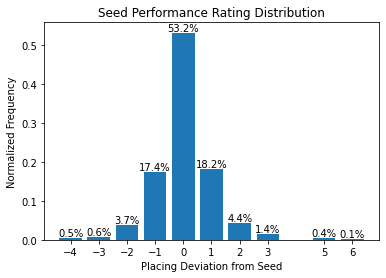

In [29]:
import matplotlib.pyplot as plt
# Get value counts and normalize
value_counts = dict(zip(*np.unique(tournament_history[tournament_history.series == 'nc'].spr, return_counts=True)))
total_count = sum(value_counts.values())
normalized_counts = {key: value / total_count for key, value in value_counts.items()}

# Plot histogram
plt.bar(normalized_counts.keys(), normalized_counts.values())

# Set labels and title
plt.xlabel('Placing Deviation from Seed')
plt.ylabel('Normalized Frequency')
plt.title('Seed Performance Rating Distribution')

# Set x-axis ticks
plt.xticks(list(normalized_counts.keys()))

# Add labels on top of each bar
for key, value in normalized_counts.items():
    percent = round(value * 100, 1)
    label = f'{percent}%'
    plt.text(key, value, label, ha='center', va='bottom')

# Display the plot
plt.show()

In [30]:
# Most over/under seeded
spr_df = tournament_history[tournament_history.series == 'nc'].groupby('player').agg({'spr':'mean', 'placing':'count'}).reset_index()
spr_df.rename(columns={'placing': 'attendance_count'}, inplace=True)
spr_df[(spr_df.attendance_count > 2) & (abs(spr_df.spr) > 0.5)].sort_values('spr')

,player,spr,attendance_count
43,bonn,-2.000000,3
256,tito jojo,-2.000000,3
133,jib,-1.000000,7
220,rusty,-1.000000,3
109,goddicktheshafted,-0.857143,7
37,bigbuffalo,-0.800000,5
153,kingnut,-0.700000,10
180,moburu,-0.600000,5
108,gl!tch,0.636364,11
157,lecro,0.666667,3


# Nightclub Upsets

In [31]:
import copy
upset_df = copy.deepcopy(sets[sets.tournament.str.contains('nightclub')])

upset_df['nightclub'] = upset_df['tournament'].str.extract(r'(s\d+e\d+)')
upset_df['loser_tag'] = np.where(upset_df['winner_tag'] == upset_df['p1_tag'],upset_df['p2_tag'],upset_df['p1_tag'])
upset_df['winner_score'] = np.where(upset_df['winner_tag'] == upset_df['p1_tag'],upset_df['p1_score'],upset_df['p2_score'])
upset_df['loser_score'] = np.where(upset_df['winner_tag'] == upset_df['p1_tag'],upset_df['p2_score'],upset_df['p1_score'])
upset_df['winner_seed'] = np.where(upset_df['winner_tag'] == upset_df['p1_tag'],upset_df['p1_seed'],upset_df['p2_seed'])
upset_df['loser_seed'] = np.where(upset_df['winner_tag'] == upset_df['p1_tag'],upset_df['p2_seed'],upset_df['p1_seed'])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(upset_df[(upset_df.upset_factor >= 3)][['nightclub', 'winner_tag', 'loser_tag','winner_score','loser_score', 'winner_seed','loser_seed','upset_factor']].sort_values('upset_factor',ascending=False))

,nightclub,winner_tag,loser_tag,winner_score,loser_score,winner_seed,loser_seed,upset_factor
1316,s10e10,apollo,daniel,3,2,11,1,6
1149,s10e9,cannagar,pgh fahey,3,1,12,1,6
513,s10e4,e-tie,tito jojo,3,1,13,2,6
2,s10e1,gl!tch,tito jojo,3,2,9,2,5
322,s10e3,moburu,jib,2,1,16,3,5
477,s10e4,e-tie,epoodle,3,1,13,3,5
916,s10e7,danilo calamari,e-tie,2,1,8,1,5
788,s10e6,k8a,freezus,3,0,14,4,4
1396,s10e10,luu,moburu,2,0,7,2,4
1319,s10e10,apollo,freezus,3,1,11,3,4


# PR Consideration

In [32]:
filtered_nc_placings = nc_placings[~nc_placings['player'].str.endswith('_2nd')]

filtered_nc_placings[(filtered_nc_placings.placing_count >= 3) &
                    (~filtered_nc_placings.player.isin(players_to_rank)) &
                    (filtered_nc_placings.placing_mean <= 12)].sort_values(['placing_mean'], ascending=[True])

,player,placing_count,placing_mean,placing_median,placing_max,placing_min,placing_std
220,rusty,3,11.5,13.0,13,9,2.3
